In [110]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 5.0MB/s eta 0:00:01


In [115]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,cross_validation
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import graphviz

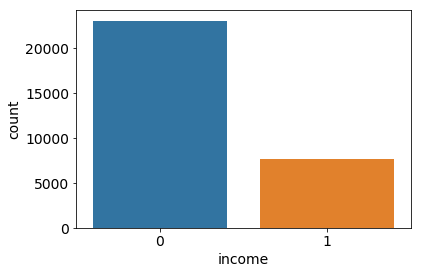

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


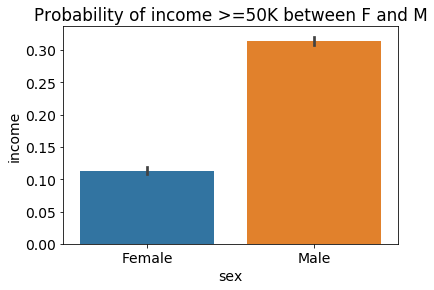

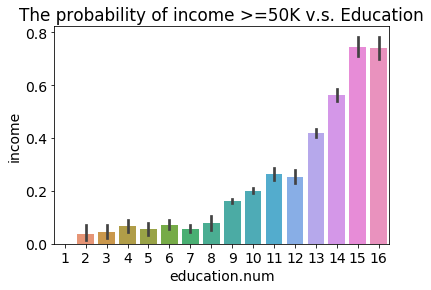

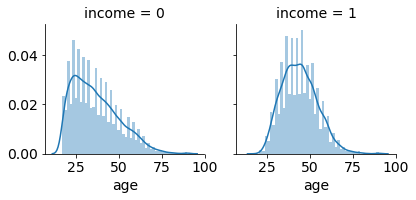

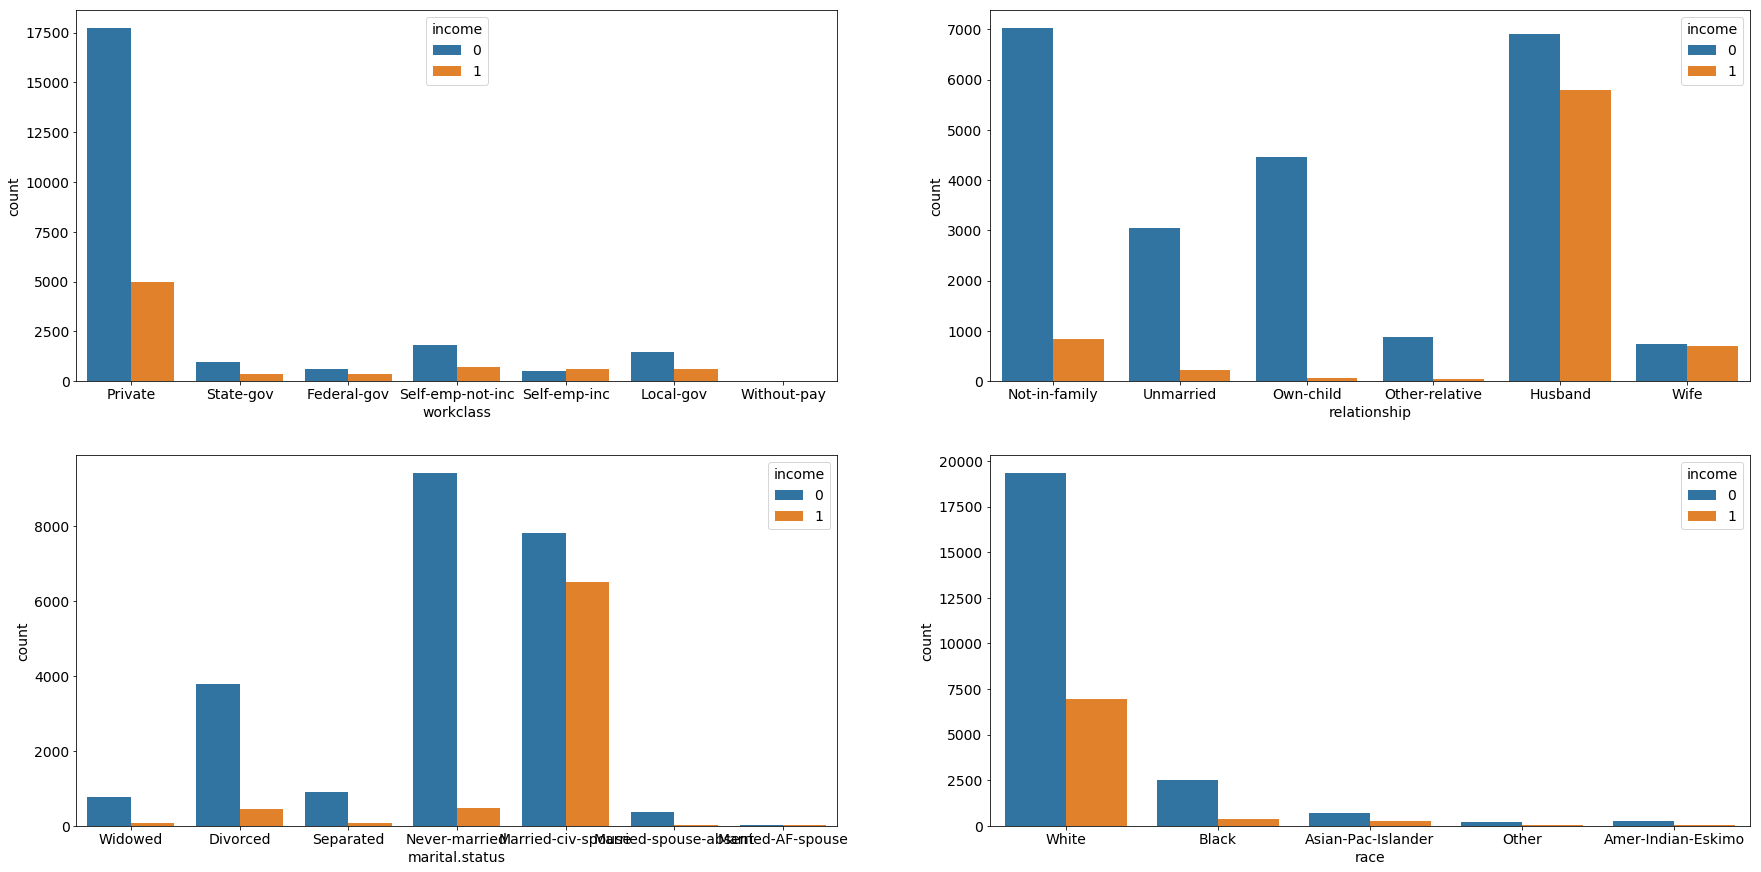

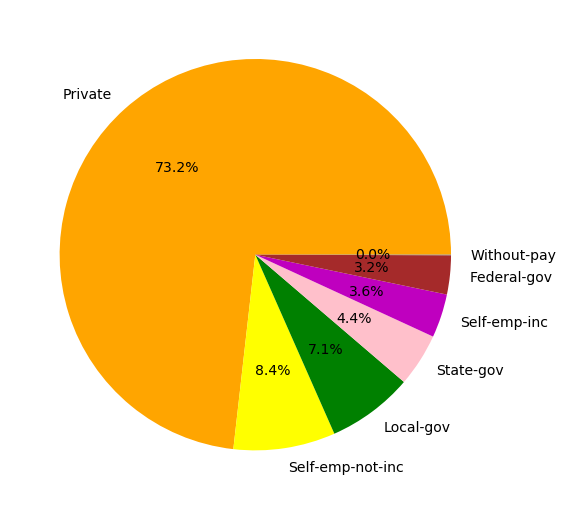

In [116]:
df=pd.read_csv('adult.csv')
df = df[df.occupation != '?']
raw_data = df[df.occupation != '?']
def cc(x):
    return sum (x== '?')
df.apply(cc)
df.dtypes
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head(2)
data=df['income']
sns.countplot(data, label='Count')
plt.show()
# 0: income less than 50k
#1: income greater than 50K
sex=df['sex']
income=df['income']
p=sns.barplot(x=sex, y=income)
p.set_title('Probability of income >=50K between F and M')
plt.show()
# Replationship between Eduation and income
education=df['education.num']
income=df['income']
p=sns.barplot(x=education, y=income)
p.set_title('The probability of income >=50K v.s. Education')
plt.show()

#Age v.s. Income
g2=sns.FacetGrid(df, col='income')
g2.map(sns.distplot, "age")
plt.show()
fig, ((a,b),(c,d))= plt.subplots(2,2,figsize=(30,15))

sns.countplot(df['workclass'],hue=df['income'],ax=a)
sns.countplot(df['relationship'],hue=df['income'],ax=b)
sns.countplot(df['marital.status'],hue=df['income'],ax=c)
sns.countplot(df['race'],hue=df['income'],ax=d)

df_us=df[df["native.country"]=="United-States"].workclass
df_us.value_counts()
labels=df_us.value_counts().index
sizes= df_us.value_counts().values
colors=["orange","yellow","green","pink","m","brown","grey"]
explode=[0,0,0,0,0,0,0]
plt.figure(figsize=(9,9))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.show()


In [108]:
#logistic Regression
#general idea of dataset
plt.rc("font", size=14)
data=pd.read_csv('adult.csv',header=0)
data=data.replace('?',np.nan).dropna()
print(data.shape)
print(list(data.columns))
data.head()

#data transformation--grouping
data['education'].unique()
data['education']=np.where(data['education'] =='Preschool', 'Basic', data['education'])
data['education']=np.where(data['education'] =='1st-4th', 'Basic', data['education'])
data['education']=np.where(data['education'] =='5th-6th', 'Basic', data['education'])
data['education']=np.where(data['education'] =='7th-8th', 'Basic', data['education'])
data['education']=np.where(data['education'] =='9th', 'Basic', data['education'])
data['education']=np.where(data['education'] =='10th', 'Basic', data['education'])
data['education']=np.where(data['education'] =='11th', 'Basic', data['education'])
data['education']=np.where(data['education'] =='12th', 'Basic', data['education'])
data['education']=np.where(data['education'] =='HS-grad', 'Basic', data['education'])
data['education'].unique()
data['y'].value_counts()
data['marital.status'].unique()
data['marital.status']=np.where(data['marital.status'] =='Married-civ-spouse', 'Married', data['marital.status'])
data['marital.status']=np.where(data['marital.status'] =='Married-spouse-absent', 'Married', data['marital.status'])
data['marital.status']=np.where(data['marital.status'] =='Married-AF-spouse', 'Married', data['marital.status'])
data['marital.status'].unique()
data['native.country'].unique()
data['native.country']=np.where(data['native.country'] =='Mexico', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Greece', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Vietnam', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='China', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Taiwan', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='India', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Philippines', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Trinadad&Tobago', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Canada', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='South', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Holand-Netherlands', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Puerto-Rico', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Poland', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Iran', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='England', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Germany', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Italy', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Japan', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Hong', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Honduras', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Cuba', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Ireland', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Cambodia', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Peru', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Nicaragua', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Dominican-Republic', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Haiti', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Hungary', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Columbia', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Guatemala', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='El-Salvador', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Jamaica', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Ecuador', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='France', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Yugoslavia', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Portugal', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Laos', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Thailand', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Scotland', 'Non-US', data['native.country'])
data['native.country']=np.where(data['native.country'] =='Outlying-US(Guam-USVI-etc)', 'Non-US', data['native.country'])
data['native.country'].unique()
data['workclass'].unique()
data['workclass']=np.where(data['workclass'] =='State-gov', 'Gov', data['workclass'])
data['workclass']=np.where(data['workclass'] =='Federal-gov', 'Gov', data['workclass'])
data['workclass']=np.where(data['workclass'] =='Local-gov', 'Gov', data['workclass'])
data['workclass']=np.where(data['workclass'] =='Self-emp-not-inc', 'Self-emp', data['workclass'])
data['workclass']=np.where(data['workclass'] =='Self-emp-inc', 'Self-emp', data['workclass'])
data['workclass'].unique()
count_low_income=len(data[data['y']==0])
count_high_income=len(data[data['y']==1])
pct_of_low_income=count_low_income/(count_low_income+count_high_income)
print("percentage of low income is", pct_of_low_income*100)
pct_of_high_income=count_high_income/(count_low_income+count_high_income)
print("percentage of low income is", pct_of_high_income*100)
data.groupby('y').mean()
#data.groupby('workclass').mean()
#data.groupby('education').mean()
#data.groupby('marital.status').mean()
#data.groupby('race').mean()
#data.groupby('sex').mean()
#data.groupby('native.country').mean()

(30162, 18)
['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'race.num', 'sex', 'sex.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income', 'y']
percentage of low income is 75.10775147536636
percentage of low income is 24.892248524633644


,age,fnlwgt,education.num,race.num,sex.num,capital.gain,capital.loss,hours.per.week
y,,,,,,,,
0,36.60806,190338.646729,9.629116,0.235764,0.617286,148.893838,53.448000,39.348592
1,43.95911,188149.962174,11.606420,0.139584,0.851891,3937.679808,193.750666,45.706580


Text(0, 0.5, 'Portion of Income by Education Level')

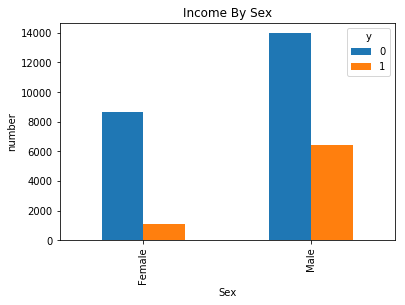

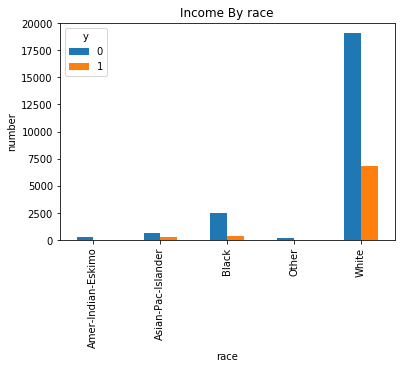

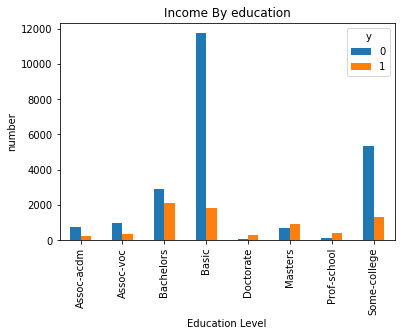

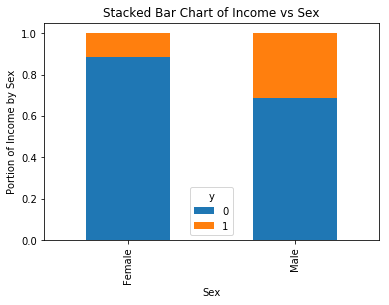

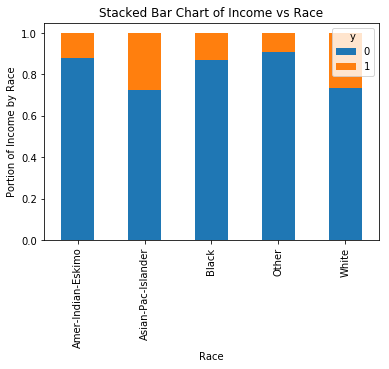

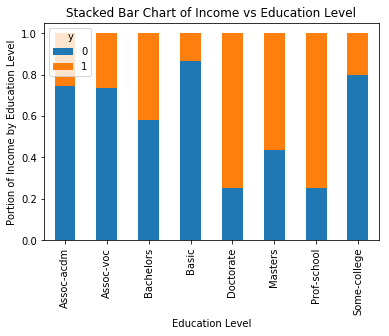

In [64]:
#Visualization after data transformation
%matplotlib inline
pd.crosstab(data.sex,data.y).plot(kind='bar')
plt.title('Income By Sex')
plt.xlabel('Sex')
plt.ylabel('number')
pd.crosstab(data.race,data.y).plot(kind='bar')
plt.title('Income By race')
plt.xlabel('race')
plt.ylabel('number')
pd.crosstab(data.education,data.y).plot(kind='bar')
plt.title('Income By education')
plt.xlabel('Education Level')
plt.ylabel('number')

table=pd.crosstab(data.sex,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Income vs Sex')
plt.xlabel('Sex')
plt.ylabel('Portion of Income by Sex')
table=pd.crosstab(data.race,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Income vs Race')
plt.xlabel('Race')
plt.ylabel('Portion of Income by Race')
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Income vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Portion of Income by Education Level')



In [46]:
#dummy values
cat_vars=['education','workclass','marital.status','occupation','relationship','race','sex','native.country','income']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

cat_vars=['education','workclass','marital.status','occupation','relationship','race','sex','native.country','income']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values


array(['age', 'fnlwgt', 'education.num', 'race.num', 'sex.num',
       'capital.gain', 'capital.loss', 'hours.per.week', 'y',
       'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Basic', 'education_Doctorate',
       'education_Masters', 'education_Prof-school',
       'education_Some-college', 'workclass_Gov', 'workclass_Private',
       'workclass_Self-emp', 'workclass_Without-pay',
       'marital.status_Divorced', 'marital.status_Married',
       'marital.status_Never-married', 'marital.status_Separated',
       'marital.status_Widowed', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',

In [21]:
!pip install --upgrade pip
!pip install imblearn

  Using cached https://files.pythonhosted.org/packages/c2/d7/90f34cb0d83a6c5631cf71dfe64cc1054598c843a92b400e55675cc2ac37/pip-18.1-py2.py3-none-any.whl
mkl-random 1.0.1 requires cython, which is not installed.
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [47]:
#Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of low income in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of high income",len(os_data_y[os_data_y['y']==1]))
print("Proportion of low income data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of high income data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  31786
Number of low income in oversampled data 15893
Number of high income 15893
Proportion of low income data in oversampled data is  0.5
Proportion of high income data in oversampled data is  0.5


In [95]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()

rfe = RFE(logreg, 10)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/linear_model/logisti

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/linear_model/logisti

[False False False False False False False False False False False  True
 False False False  True  True  True  True False False  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False  True  True]
[39 47 26 22 29 46 45 38 13  6 18  1 33 24 41  1  1  1  1 42 12  1  1 20
 32 11 44  7 36 10  9  8  5 37 23 30 16 28 15 35  4 19  2  3 31 40 34 17
 43 21  1 25 14 27  1  1]


/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
!pip install statsmodels

    100% |████████████████████████████████| 9.6MB 2.8MB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 9.3MB/s eta 0:00:01


In [100]:
#features 
cols=['education_Basic', 
       'education_Some-college', 'workclass_Gov', 'workclass_Private',
       'workclass_Self-emp','marital.status_Married','marital.status_Never-married', 
      'sex_Female', 'income_>50K'] 
X=os_data_X[cols]
y=os_data_y['y']
print(X)
print(y)

       education_Basic  education_Some-college  workclass_Gov  \
0                    0                       1              1   
1                    1                       0              1   
2                    1                       0              0   
3                    0                       1              0   
4                    0                       0              0   
5                    0                       0              1   
6                    1                       0              0   
7                    1                       0              0   
8                    1                       0              0   
9                    1                       0              0   
10                   1                       0              0   
11                   1                       0              0   
12                   1                       0              0   
13                   0                       0              0   
14                   0   

In [101]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 2.136982
         Iterations: 35
                                 Results: Logit
Model:                    Logit                Pseudo R-squared:     -2.083     
Dependent Variable:       y                    AIC:                  135870.2419
Date:                     2018-12-10 10:43     BIC:                  135945.5429
No. Observations:         31786                Log-Likelihood:       -67926.    
Df Model:                 8                    LL-Null:              -22032.    
Df Residuals:             31777                LLR p-value:          1.0000     
Converged:                0.0000               Scale:                1.0000     
No. Iterations:           35.0000                                               
--------------------------------------------------------------------------------
                              Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
----------------------------------------------------------------------------

/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [102]:
#remove "sex-female" & "income>50k" bc p-value is less than 0.05
cols=['education_Basic', 
       'education_Some-college', 'workclass_Gov', 'workclass_Private',
       'workclass_Self-emp','marital.status_Married','marital.status_Never-married', 
      ] 
X=os_data_X[cols]
y=os_data_y['y']
print(X)
print(y)

       education_Basic  education_Some-college  workclass_Gov  \
0                    0                       1              1   
1                    1                       0              1   
2                    1                       0              0   
3                    0                       1              0   
4                    0                       0              0   
5                    0                       0              1   
6                    1                       0              0   
7                    1                       0              0   
8                    1                       0              0   
9                    1                       0              0   
10                   1                       0              0   
11                   1                       0              0   
12                   1                       0              0   
13                   0                       0              0   
14                   0   

In [103]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.416185
         Iterations 7
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.400     
Dependent Variable:     y                    AIC:                  26471.7325
Date:                   2018-12-10 10:44     BIC:                  26530.3000
No. Observations:       31786                Log-Likelihood:       -13229.   
Df Model:               6                    LL-Null:              -22032.   
Df Residuals:           31779                LLR p-value:          0.0000    
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         7.0000                                               
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print(metrics.accuracy_score(y_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.84
0.839765100671141


/Users/wangpeiyu/anaconda3/envs/xyz/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4120  604]
 [ 924 3888]]


In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      4724
           1       0.87      0.81      0.84      4812

   micro avg       0.84      0.84      0.84      9536
   macro avg       0.84      0.84      0.84      9536
weighted avg       0.84      0.84      0.84      9536



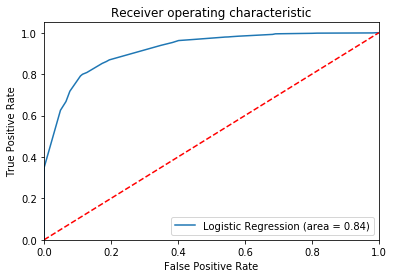

In [107]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [ ]:
#xgboost

#Data preprocessing
adult_origin = pd.read_csv('C:/Users/zren3/OneDrive/Desktop/Study/CSCI6364/HW3/adult.csv', header = 0)
adult_cleaned = adult_origin[(adult_origin.astype(str) != '?').all(axis = 1)]
del adult_cleaned['education']

#Set dummy variable
adult_cleaned = pd.concat([adult_cleaned, pd.get_dummies(adult_cleaned['workclass'],prefix='workclass',prefix_sep=':')], axis=1)
adult_cleaned.drop('workclass',axis=1,inplace=True)
adult_cleaned = pd.concat([adult_cleaned,pd.get_dummies(adult_cleaned['marital.status'],prefix ='marital.status',prefix_sep=':')],axis=1)
adult_cleaned.drop('marital.status',axis=1,inplace=True)
adult_cleaned = pd.concat([adult_cleaned,pd.get_dummies(adult_cleaned['occupation'],prefix='occupation',prefix_sep=':')],axis=1)
adult_cleaned.drop('occupation',axis=1,inplace=True)
adult_cleaned = pd.concat([adult_cleaned,pd.get_dummies(adult_cleaned['relationship'],prefix='relationship',prefix_sep=':')],axis=1)
adult_cleaned.drop('relationship',axis=1,inplace=True)
adult_cleaned = pd.concat([adult_cleaned,pd.get_dummies(adult_cleaned['race'],prefix='race',prefix_sep=':')],axis=1)
adult_cleaned.drop('race',axis=1,inplace=True)
adult_cleaned = pd.concat([adult_cleaned,pd.get_dummies(adult_cleaned['sex'],prefix='sex',prefix_sep=':')],axis=1)
adult_cleaned.drop('sex',axis=1,inplace=True)
adult_cleaned = pd.concat([adult_cleaned,pd.get_dummies(adult_cleaned['native.country'],prefix='native.country',prefix_sep=':')],axis=1)
adult_cleaned.drop('native.country',axis=1,inplace=True)

#Set train,test sets
X = adult_cleaned.drop(['income'],1)
y = adult_cleaned['income']
X = preprocessing.scale(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size = 0.2)
X_train = pd.DataFrame(X_train,columns = adult_cleaned.drop(['income'],1).columns)
X_test = pd.DataFrame(X_test,columns = adult_cleaned.drop(['income'],1).columns)

In [ ]:
#Train XGboost model
model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=7,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)
predictions = model.predict(X_test)
XGBA = accuracy_score(y_test, predictions)

In [ ]:
#Result
print(model.get_params())
print("The Accuracy  is {}".format(XGBA))
p = precision_score(y_test, predictions, average='binary',pos_label='>50K')
r = recall_score(y_test, predictions, average='binary',pos_label='>50K')
f1score = f1_score(y_test, predictions, average='binary',pos_label='>50K')
print("precision: %s"% p)
print("recall: %s"% r)
print("f1score: %s"% f1score)

In [ ]:
#Plot feature importance
xgb.plot_importance(final_m,max_num_features=10)
plt.show()

In [ ]:
#plot tree diagram

def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()
ceate_feature_map(X_train.columns)

fig,ax = plt.subplots()
fig.set_size_inches(300,50)
xgb.plot_tree(final_m,ax = ax,fmap='xgb.fmap')